In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('SMS_train.csv',encoding='ISO-8859-1')
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [3]:
data.shape

(957, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        957 non-null    int64 
 1   Message_body  957 non-null    object
 2   Label         957 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.6+ KB


In [5]:
print(data.isna().sum())

S. No.          0
Message_body    0
Label           0
dtype: int64


In [6]:
data['Label'].value_counts()

Non-Spam    835
Spam        122
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

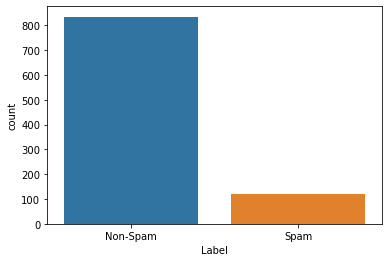

In [7]:
sns.countplot(x='Label',data=data)

In [8]:
data['Label'] = data['Label'].map({'Non-Spam':0,'Spam':1})

In [9]:
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,0
1,2,The guy did some bitching but I acted like i'd...,0
2,3,"Pity, * was in mood for that. So...any other s...",0
3,4,Will ü b going to esplanade fr home?,0
4,5,This is the 2nd time we have tried 2 contact u...,1


In [10]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
tweets = data.Message_body
tweets

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today? r u workin har...
953                        How much you got for cleaning
954    Sorry da. I gone mad so many pending works wha...
955                                   Wat time ü finish?
956                      Just glad to be talking to you.
Name: Message_body, Length: 957, dtype: object

In [12]:
from nltk import TweetTokenizer
twt = TweetTokenizer()
tweets = tweets.apply(lambda x:twt.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today ? r u workin ha...
953                        How much you got for cleaning
954    Sorry da . I gone mad so many pending works wh...
955                                  Wat time ü finish ?
956                     Just glad to be talking to you .
Name: Message_body, Length: 957, dtype: object

In [13]:
tweets = tweets.str.replace('[^a-zA-z0-9]+',' ')
tweets

C:\Users\HP\AppData\Local\Temp\ipykernel_20288\2106900710.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets = tweets.str.replace('[^a-zA-z0-9]+',' ')


0                              Rofl Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity was in mood for that So any other suggest...
3                     Will b going to esplanade fr home 
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today r u workin hard...
953                        How much you got for cleaning
954    Sorry da I gone mad so many pending works what...
955                                     Wat time finish 
956                      Just glad to be talking to you 
Name: Message_body, Length: 957, dtype: object

In [15]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
tweets = tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in twt.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

0                                rofl it true to it name
1      the guy did some bitch but i act like i d be i...
2         piti was in mood for that so ani other suggest
3                          will b go to esplanad fr home
4      this is the 2nd time we have tri 2 contact u u...
                             ...                        
952    how my favourit person today r u workin hard c...
953                           how much you got for clean
954     sorri da i gone mad so mani pend work what to do
955                                      wat time finish
956                          just glad to be talk to you
Name: Message_body, Length: 957, dtype: object

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets = tweets.apply(lambda x:[i for i in twt.tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
tweets

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                  b go esplanad fr home
4      2nd time tri 2 contact u u 750 pound prize 2 c...
                             ...                        
952    favourit person today r u workin hard sleep la...
953                                       much got clean
954                     sorri da gone mad mani pend work
955                                      wat time finish
956                                            glad talk
Name: Message_body, Length: 957, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vec_data = tfidf.fit_transform(tweets)
print(vec_data)

  (0, 1607)	0.5239133658599108
  (0, 2412)	0.5348011938730758
  (0, 1981)	0.6629498232183731
  (1, 1014)	0.20685451620336232
  (1, 2466)	0.25695881028253453
  (1, 1055)	0.31170172048017486
  (1, 2544)	0.22410916475021456
  (1, 1633)	0.26039666602750017
  (1, 869)	0.2882818418444124
  (1, 2156)	0.2724135649422304
  (1, 536)	0.26408940286140065
  (1, 1271)	0.31170172048017486
  (1, 1404)	0.21064082892249417
  (1, 284)	0.33715572416911704
  (1, 470)	0.3573597035259757
  (1, 1122)	0.25695881028253453
  (2, 2249)	0.5138426627886205
  (2, 341)	0.3777725454832968
  (2, 1564)	0.5446345663733484
  (2, 1784)	0.5446345663733484
  (3, 1192)	0.3893211940097363
  (3, 1011)	0.6301473479829771
  (3, 896)	0.5945208241057491
  (3, 1079)	0.31287108755759896
  (4, 1904)	0.238238740069249
  :	:
  (952, 952)	0.35537664026208104
  (952, 2595)	0.33528477698560794
  (952, 1616)	0.33528477698560794
  (952, 1145)	0.3210293731266606
  (952, 1641)	0.28084564657371425
  (952, 2371)	0.21798757172039906
  (952, 1370)

In [24]:
x = vec_data
y = data['Label']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50)
forest.fit(x_train,y_train)
model = forest.predict(x_test)
model

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(model,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       179
           1       0.52      0.92      0.67        13

    accuracy                           0.94       192
   macro avg       0.76      0.93      0.82       192
weighted avg       0.96      0.94      0.95       192



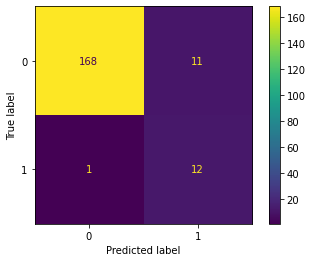

In [28]:
ConfusionMatrixDisplay.from_predictions(model,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

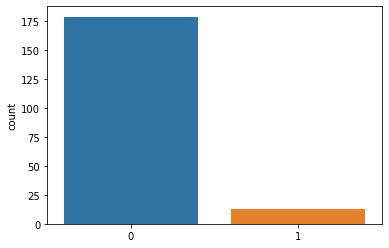

In [30]:
sns.countplot(model,data=data)